In [1]:
from pylab import *

%run ~/pizza/src/pizza.py
%matplotlib inline

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
gl tool did not load:
  No module named OpenGL.Tk
image tool did not load:
  No module named Image
animate tool did not load:
  No module named ImageTk


In [2]:
from numba import njit
import seaborn as sns

sns.set()
sns.set_context("paper", rc={"axes.labelsize":20})
rcParams['figure.figsize'] = (12, 8)

In [3]:
%%capture

k = []
r = range(4, 25, 4)
phi = []

for ri in r:
    data = dump("dump.lammpstrj_{}".format(ri))
    t = data.time()
    avg_vx = 0.0
    avg_fx = 0.0

    for ti in t:
        vx = array(data.vecs(ti, "vx"))
        fx = array(data.vecs(ti, "vx"))

        avg_vx += vx.mean()
        avg_fx += fx.mean()

    avg_vx /= len(t)
    avg_fx /= len(t)
    mu = (0.1 * ((ri/2)**2))/(4 * avg_vx)
    k.append(avg_vx*mu*(avg_fx - 0.1))
    phi.append(16.8*pi*ri**2/(2*16.8)**3)

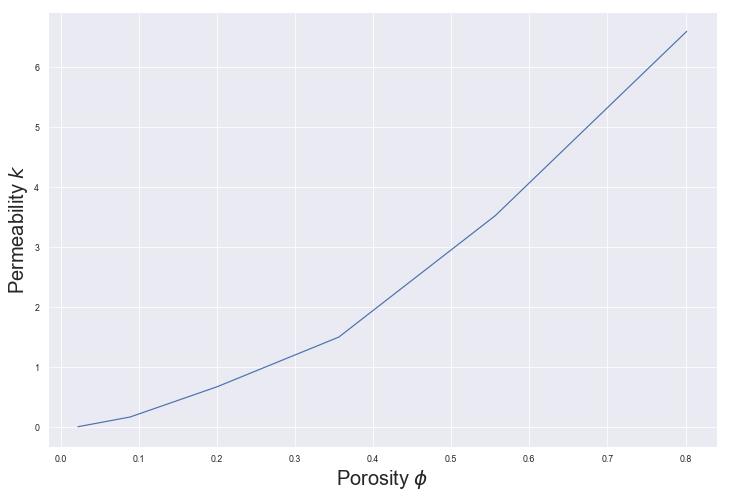

In [4]:
p = sns.lineplot(phi, k)
p.set_xlabel(r"Porosity $\phi$")
p.set_ylabel(r"Permeability $k$")
show()

In [5]:
ls

dump.lammpstrj     dump.lammpstrj_20  dump.lammpstrj_4   lmp_mpi_run.sh
dump.lammpstrj_10  dump.lammpstrj_24  dump.lammpstrj_40  log.lammps
dump.lammpstrj_12  dump.lammpstrj_25  dump.lammpstrj_5   task_i.ipynb
dump.lammpstrj_15  dump.lammpstrj_30  dump.lammpstrj_8
dump.lammpstrj_16  dump.lammpstrj_35  in.liquidi
